In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import make_pipeline


In [7]:
# Load the datasets
# Load the datasets with skipping bad lines
fake_df = pd.read_csv('/content/Fake.csv', on_bad_lines='skip')
real_df = pd.read_csv('/content/True.csv', on_bad_lines='skip')


# Add a 'label' column: 0 for fake, 1 for real
fake_df['label'] = 0
real_df['label'] = 1

# Combine both datasets into one
df = pd.concat([fake_df[['text', 'label']], real_df[['text', 'label']]], ignore_index=True)

# Check the first few rows of the combined dataset
print(df.head())


                                                text  label
0  Donald Trump just couldn t wish all Americans ...      0
1  House Intelligence Committee Chairman Devin Nu...      0
2  On Friday, it was revealed that former Milwauk...      0
3  On Christmas day, Donald Trump announced that ...      0
4  Pope Francis used his annual Christmas Day mes...      0


In [8]:
# Split the data into features (X) and labels (y)
X = df['text']  # Features: News text
y = df['label']  # Labels: 0 for fake, 1 for real

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [9]:
# Create a pipeline that combines the vectorizer and classifier
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
# Train the model using the training data
model.fit(X_train, y_train)
# Predict on the test data
y_pred = model.predict(X_test)


In [10]:
# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Display a detailed classification report
print(classification_report(y_test, y_pred))


Accuracy: 93.67%
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7091
           1       0.94      0.92      0.93      6379

    accuracy                           0.94     13470
   macro avg       0.94      0.94      0.94     13470
weighted avg       0.94      0.94      0.94     13470



In [11]:
import joblib

# Save the model
joblib.dump(model, 'fake_news_model.pkl')


['fake_news_model.pkl']

In [12]:

# Check basic information
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Basic statistical summary
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44898 non-null  object
 1   label   44898 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 701.7+ KB
None
text     0
label    0
dtype: int64
              label
count  44898.000000
mean       0.477015
std        0.499477
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000


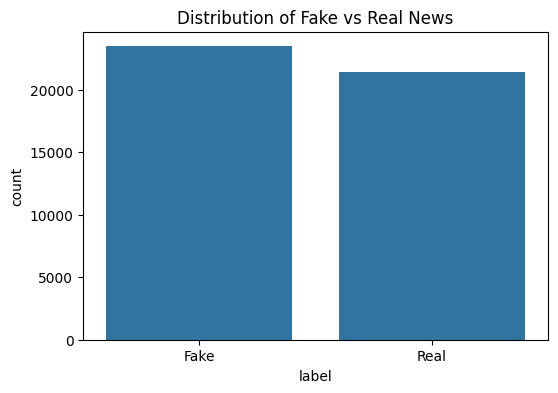

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
# Distribution of labels (fake vs. real)
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df)
plt.title('Distribution of Fake vs Real News')
plt.xticks(ticks=[0, 1], labels=['Fake', 'Real'])
plt.show()


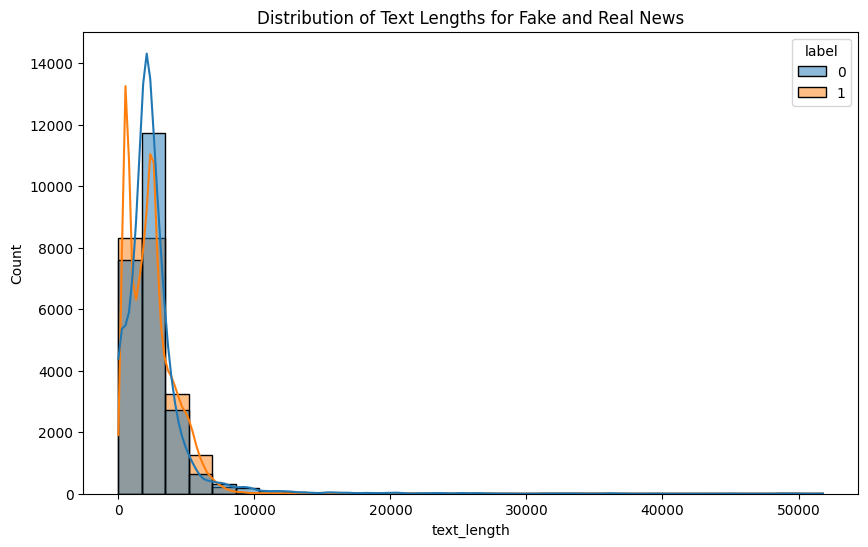

In [15]:
# Add a column for the length of each news article
df['text_length'] = df['text'].apply(lambda x: len(str(x)))

# Visualize the distribution of text lengths for fake and real news
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='text_length', hue='label', kde=True, bins=30)
plt.title('Distribution of Text Lengths for Fake and Real News')
plt.show()


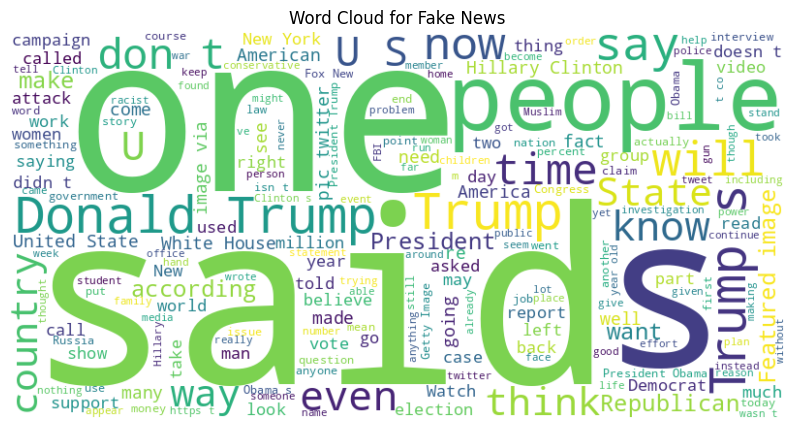

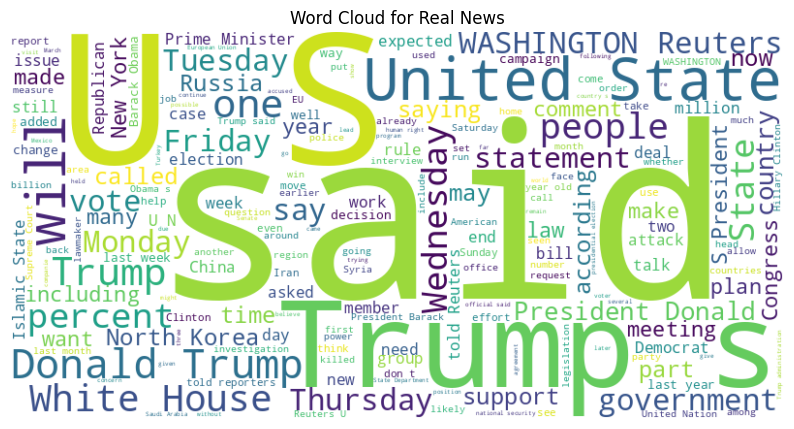

In [16]:
# Word cloud for fake news
fake_text = " ".join(fake_df['text'].dropna())
fake_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(fake_text)

plt.figure(figsize=(10, 6))
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Fake News')
plt.axis('off')
plt.show()

# Word cloud for real news
real_text = " ".join(real_df['text'].dropna())
real_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(real_text)

plt.figure(figsize=(10, 6))
plt.imshow(real_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Real News')
plt.axis('off')
plt.show()


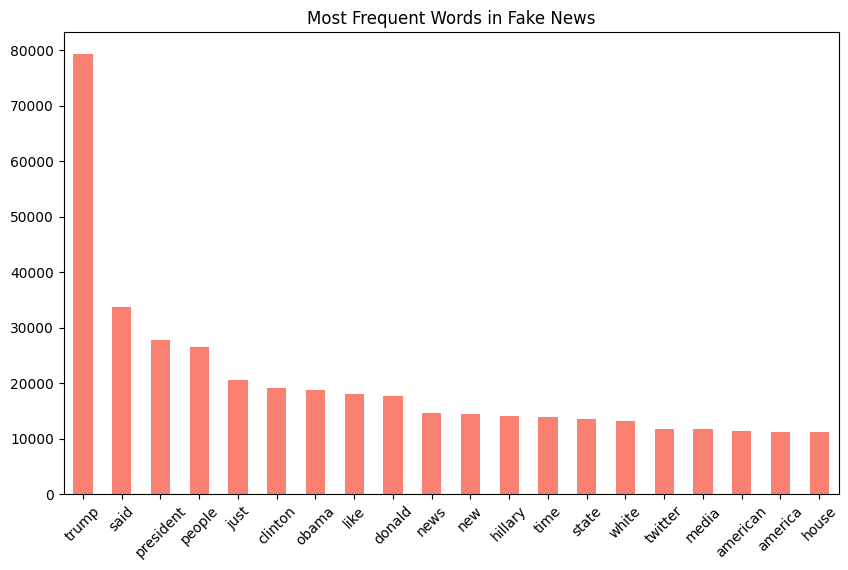

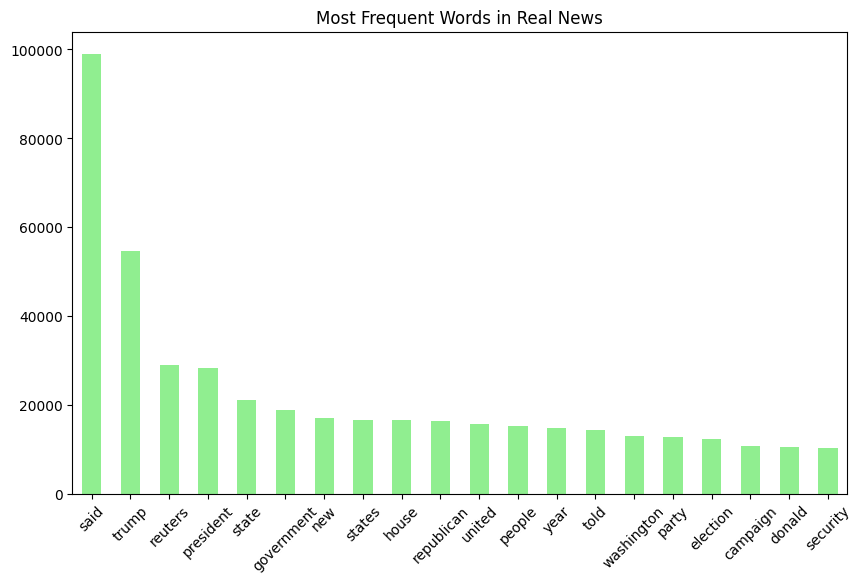

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer to extract the most common words
vectorizer = CountVectorizer(stop_words='english', max_features=20)

# Fit on the fake news data
fake_words = vectorizer.fit_transform(fake_df['text'].dropna())
fake_word_freq = pd.DataFrame(fake_words.toarray(), columns=vectorizer.get_feature_names_out())
fake_word_freq = fake_word_freq.sum().sort_values(ascending=False)

# Plot the most common words in fake news
plt.figure(figsize=(10, 6))
fake_word_freq.head(20).plot(kind='bar', color='salmon')
plt.title('Most Frequent Words in Fake News')
plt.xticks(rotation=45)
plt.show()

# Fit on the real news data
real_words = vectorizer.fit_transform(real_df['text'].dropna())
real_word_freq = pd.DataFrame(real_words.toarray(), columns=vectorizer.get_feature_names_out())
real_word_freq = real_word_freq.sum().sort_values(ascending=False)

# Plot the most common words in real news
plt.figure(figsize=(10, 6))
real_word_freq.head(20).plot(kind='bar', color='lightgreen')
plt.title('Most Frequent Words in Real News')
plt.xticks(rotation=45)
plt.show()


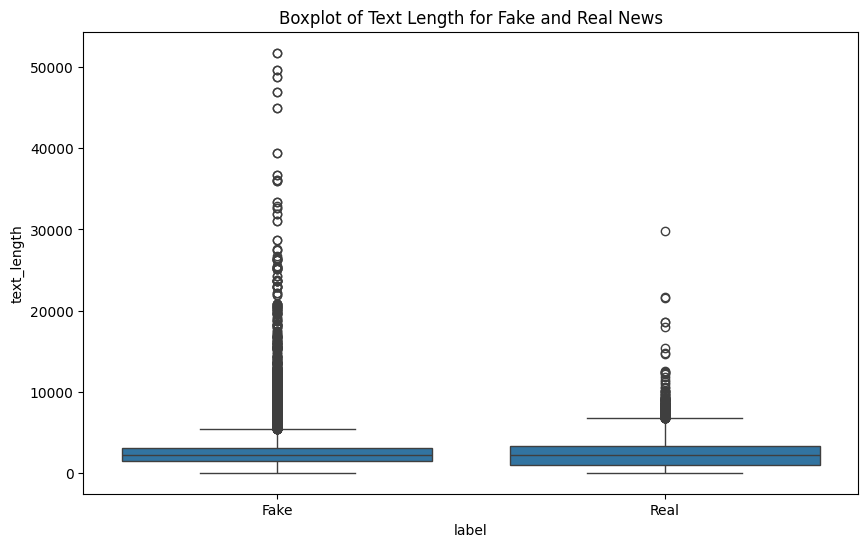

In [18]:
# Visualize the correlation between text length and label
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='text_length', data=df)
plt.title('Boxplot of Text Length for Fake and Real News')
plt.xticks(ticks=[0, 1], labels=['Fake', 'Real'])
plt.show()


In [19]:
# Check for duplicate articles
duplicate_news = df[df.duplicated(subset='text')]
print(f"Number of duplicate news articles: {len(duplicate_news)}")

# If you want to remove duplicates, you can do:
df = df.drop_duplicates(subset='text')


Number of duplicate news articles: 6252


<class 'pandas.core.frame.DataFrame'>
Index: 38646 entries, 0 to 44897
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   text         38646 non-null  object
 1   label        38646 non-null  int64 
 2   text_length  38646 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ MB
None
Number of unique articles: 38646


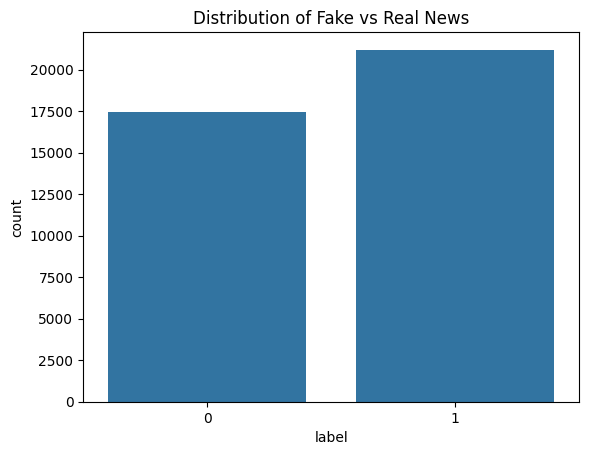

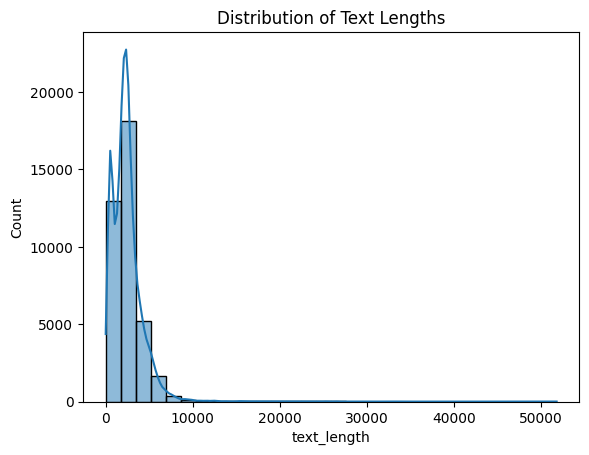

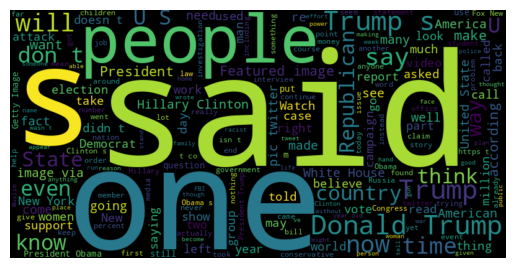

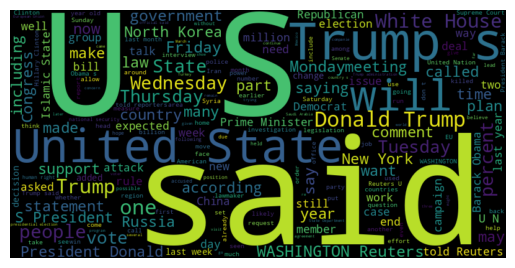

In [20]:
# Basic information about the dataset
print(df.info())

# Number of unique texts
print(f"Number of unique articles: {df['text'].nunique()}")

# Distribution of the label
sns.countplot(x='label', data=df)
plt.title('Distribution of Fake vs Real News')
plt.show()

# Distribution of text lengths
sns.histplot(df['text_length'], kde=True, bins=30)
plt.title('Distribution of Text Lengths')
plt.show()

# Word Cloud for Fake News
fake_text = " ".join(fake_df['text'].dropna())
fake_wordcloud = WordCloud(width=800, height=400).generate(fake_text)
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Word Cloud for Real News
real_text = " ".join(real_df['text'].dropna())
real_wordcloud = WordCloud(width=800, height=400).generate(real_text)
plt.imshow(real_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Most frequent words for Fake and Real news
# (Use the code from the 'Most Frequent Words' section)


In [22]:
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

# Vectorizer and model setup
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)  # X_train is the training text data

# Save the vectorizer
joblib.dump(vectorizer, 'vectorizer.pkl')

# Model training
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)  # y_train is the training labels

# Save the trained model
joblib.dump(model, 'fake_news_model.pkl')


['fake_news_model.pkl']

TESTING OF MODEL

In [23]:
import joblib

# Load the trained model and vectorizer
model = joblib.load('fake_news_model.pkl')
vectorizer = joblib.load('vectorizer.pkl')

# Define the function to test the model with a new article
def predict_fake_news(article_text):
    # Transform the article text using the vectorizer
    article_tfidf = vectorizer.transform([article_text])

    # Make a prediction
    prediction = model.predict(article_tfidf)

    # Return the result
    return 'Fake' if prediction[0] == 0 else 'Real'

# Example usage
sample_article = """
The government has announced a new policy change that will impact tax rates.
This change will take effect from next year and is expected to have a positive effect on the economy.
"""

# Predict and print the result
result = predict_fake_news(sample_article)
print(f"The article is predicted to be: {result}")


The article is predicted to be: Real


In [24]:
import joblib

# Load the trained model and vectorizer
model = joblib.load('fake_news_model.pkl')
vectorizer = joblib.load('vectorizer.pkl')

# Define the function to test the model with a new article
def predict_fake_news(article_text):
    # Transform the article text using the vectorizer
    article_tfidf = vectorizer.transform([article_text])

    # Make a prediction
    prediction = model.predict(article_tfidf)

    # Return the result
    return 'Fake' if prediction[0] == 0 else 'Real'

# Example usage
sample_article = sample_article = """
Scientists have made a groundbreaking discovery that could change the way we understand the universe.
According to researchers, they found evidence of a new subatomic particle that could redefine physics as we know it.
This discovery, if verified, could have profound implications for our understanding of the fundamental forces of nature.
"""
# Predict and print the result
result = predict_fake_news(sample_article)
print(f"The article is predicted to be: {result}")

The article is predicted to be: Fake


In [25]:
import joblib

# Load the trained model and vectorizer
model = joblib.load('fake_news_model.pkl')
vectorizer = joblib.load('vectorizer.pkl')

# Define the function to test the model with a new article
def predict_fake_news(article_text):
    # Transform the article text using the vectorizer
    article_tfidf = vectorizer.transform([article_text])

    # Make a prediction
    prediction = model.predict(article_tfidf)

    # Return the result
    return 'Fake' if prediction[0] == 0 else 'Real'

# Example usage
sample_article = sample_article = """
Scientists have discovered a new species of plant that has the potential to produce clean biofuel.
The plant, found in remote rainforests, is being studied for its unique properties that could revolutionize sustainable energy production.
This breakthrough could help reduce dependence on fossil fuels and combat climate change.
"""
# Predict and print the result
result = predict_fake_news(sample_article)
print(f"The article is predicted to be: {result}")

The article is predicted to be: Real
